In [1]:
import os

import pandas as pd

import plotly.express as px

In [2]:
DATA_DIR = "../data/genelab/"

In [3]:
metadata_df = pd.read_csv(
    os.path.join(
        DATA_DIR,
        "OSD-69",
        "GLDS-69_GMetagenomics_MAGs-overview.tsv"
    ),
    sep="\t"
)

metadata_df["Sample"] = metadata_df["Assembly"]\
    .apply(lambda row: "GLDS-69_GMetagenomics_" + "-".join(row.split("-")[:2]))
metadata_df["MAG"] = metadata_df["Assembly"]\
    .apply(lambda row: "-".join(row.split("-")[-2:]))
metadata_df["Sample type"] = metadata_df["Assembly"]\
    .apply(lambda row: row.split("_")[4])

metadata_df.head()

,Assembly,Total contigs,Total length,GC content,Maximum contig length,N50,L50,Num. contigs >= 10000,Num. contigs >= 50000,Num. contigs >= 100000,...,domain,phylum,class,order,family,genus,species,Sample,MAG,Sample type
0,5636_IF8SW-M_F1_L8_NORM_FLT-MAG-7,95,2923622,70.33,150042,45434,19,79,16,3,...,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Microbacteriaceae,Microbacterium,Microbacterium aurum,GLDS-69_GMetagenomics_5636_IF8SW-M_F1_L8_NORM_FLT,MAG-7,NORM
1,5806_IIF1SW-M_F2_L1_NORM_FLT-MAG-2,25,2797745,70.63,480014,148625,6,24,17,12,...,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Micrococcaceae,Kocuria,Kocuria palustris,GLDS-69_GMetagenomics_5806_IIF1SW-M_F2_L1_NORM...,MAG-2,NORM
2,5816_IIF1SW-P-M_F2_L1_PMA_FLT-MAG-1,46,2809666,70.60,193262,106696,10,41,22,11,...,Bacteria,Actinobacteriota,Actinomycetia,Actinomycetales,Micrococcaceae,Kocuria,Kocuria palustris,GLDS-69_GMetagenomics_5816_IIF1SW-P,MAG-1,PMA
3,5817_IIF2SW-P-M_F2_L2_PMA_FLT-MAG-3,102,2376795,58.81,125213,36995,22,70,11,1,...,Bacteria,Actinobacteriota,Actinomycetia,Mycobacteriales,Mycobacteriaceae,Corynebacterium,Corynebacterium amycolatum,GLDS-69_GMetagenomics_5817_IIF2SW-P,MAG-3,PMA
4,SRX3808504_IIIF2SW-P-M_F3_L2_PMA_FLT-MAG-1,112,2422513,60.06,100024,35464,24,74,11,1,...,Bacteria,Actinobacteriota,Actinomycetia,Propionibacteriales,Propionibacteriaceae,Cutibacterium,Cutibacterium acnes,GLDS-69_GMetagenomics_SRX3808504_IIIF2SW-P,MAG-1,PMA


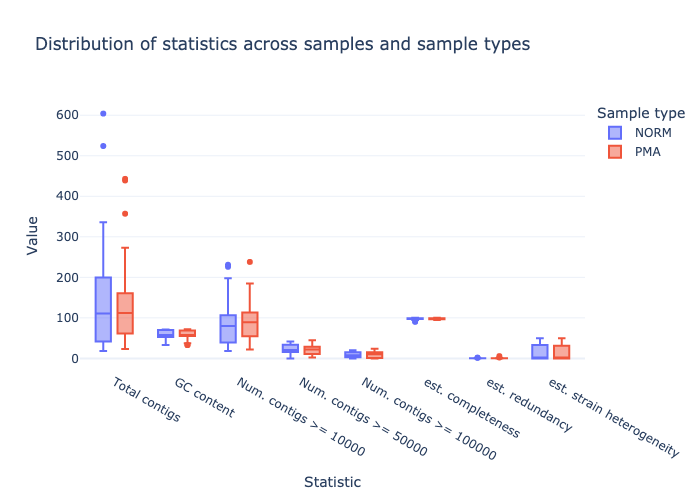

In [4]:
stats_cols = metadata_df.columns.tolist()
stats_cols = [col for col in stats_cols[1:stats_cols.index("domain")]]
stats_df = metadata_df.melt(
    id_vars=["Sample", "Sample type", "MAG"],
    value_vars=stats_cols,
    value_name="Value",
    var_name="Statistic"
)

length_cols = [
    "Total length",
    "Maximum contig length",
    "N50",
    "L50"
]

fig = px.box(
    data_frame=stats_df[~stats_df["Statistic"].isin(length_cols)],
    x="Statistic",
    y="Value",
    color="Sample type",
    category_orders={"Sample type": ["NORM", "PMA"]},
    hover_data=["Sample", "MAG"],
    title="Distribution of statistics across samples and sample types",
    template="plotly_white"
)
fig.write_image("../figures/eda-mag-stats.svg")
fig.show("png")

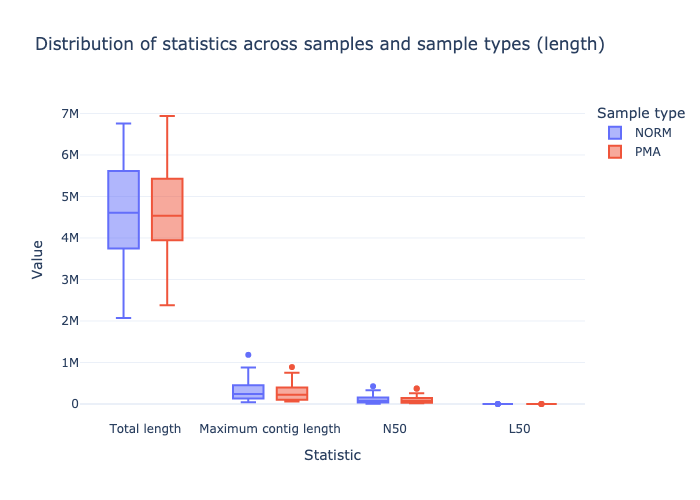

In [5]:
fig = px.box(
    data_frame=stats_df[stats_df["Statistic"].isin(length_cols)],
    x="Statistic",
    y="Value",
    color="Sample type",
    category_orders={"Sample type": ["NORM", "PMA"]},
    hover_data=["Sample", "MAG"],
    title="Distribution of statistics across samples and sample types (length)",
    template="plotly_white"
)
fig.write_image("../figures/eda-mag-stats-length.svg")
fig.show("png")

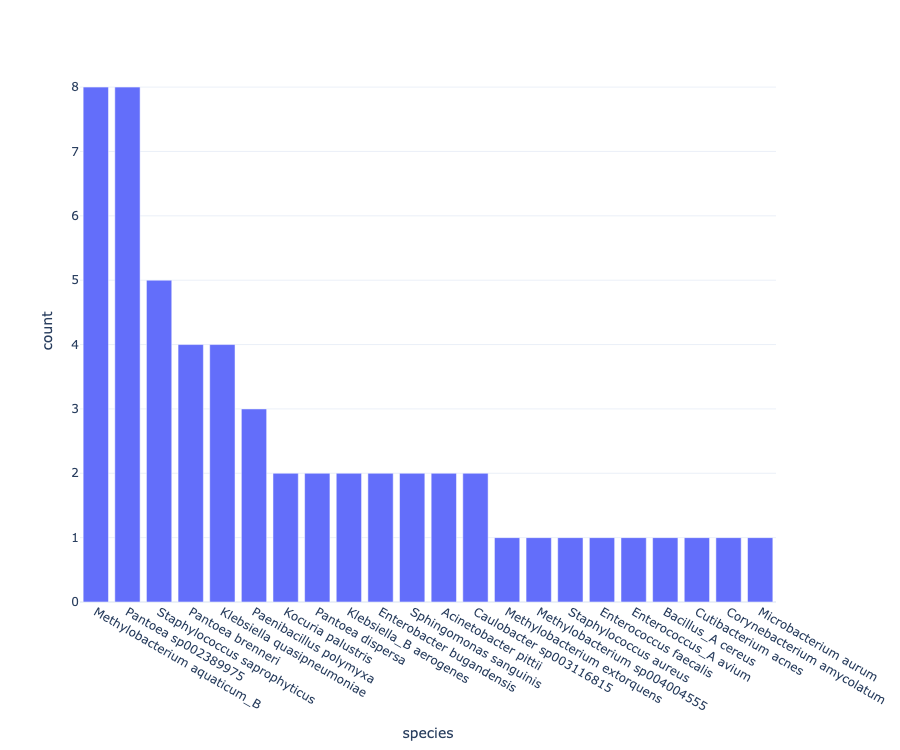

In [6]:
species_counts = metadata_df["species"].value_counts().reset_index()

fig = px.bar(
    data_frame=species_counts,
    x="species",
    y="count",
    width=900,
    height=750,
    template="plotly_white"
)
fig.write_image("../figures/eda-mag-taxa.svg")
fig.show("png")